# Exercises 13-11-2023

## Exercise 7.1
Generate a sample of pseudo-random numbers distributed according to an exponential density distribution with a characteristic time t0 of 5 seconds.

Visualize the distribution of the obtained sample in a histogram using the inverse function method.

Write all functions responsible for random number generation in a library, implemented in separate files from the main program.

### random exponentially distributed numbers using rand_TAC

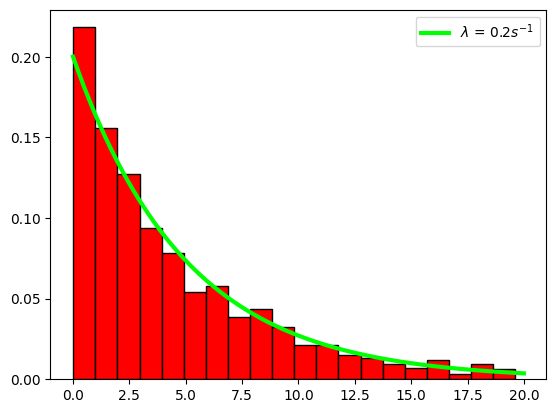

In [2]:
from scipy.stats import norm
from scipy.stats import expon
import matplotlib.pyplot as plt
import random_number_generator as rng
import numpy as np

t0 = 5

fix_expon = rng.expon(t0)
X = np.linspace(0,20, 1000)
Y = fix_expon.pdf(X)
exponential_random_numbers = np.array([rng.rand_TAC(fix_expon.pdf,0,max(X),1) for _ in range(1000)])

plt.hist(exponential_random_numbers,bins=20,density=True,color='red',edgecolor='black')
plt.plot(X,Y,label=f'$\lambda$ = {1/t0}' + '$s^{-1}$',linewidth=3,color='lime')
plt.legend()
plt.show()

### random numbers in esponential distribution using inverse CDF

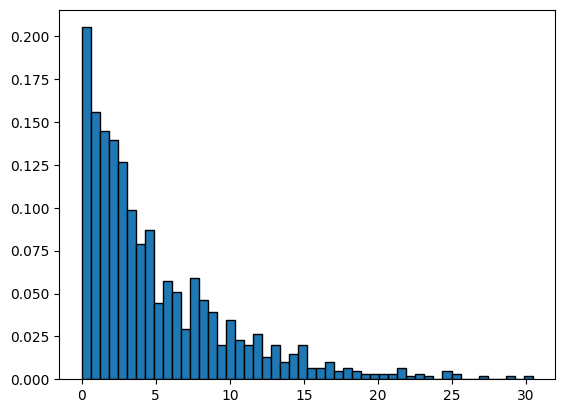

In [3]:
# Y = np.linspace(0.01,0.99,1000) # exponential_pdf(exponential_random_numbers)
Y = np.random.rand(1000)
exponential_random_numbers = -t0*np.log(1-Y) # inverse CDF

plt.hist(exponential_random_numbers,bins=50,density=True,edgecolor='black')
plt.show()

## Exercise 7.2
Use the result from the first exercise to simulate a counting experiment with Poisson characteristics:

Choose a characteristic time t0 for a radioactive decay process;

Choose a measurement time tM for the counting window;

In a loop, simulate N pseudo-experiments of counting, where, for each of them, a sequence of random events is generated with an intertime characteristic of Poisson phenomena, until the total time elapsed is greater than the measurement time, counting the number of generated events that fall within the interval.

Fill a histogram with the simulated counts for each experiment.

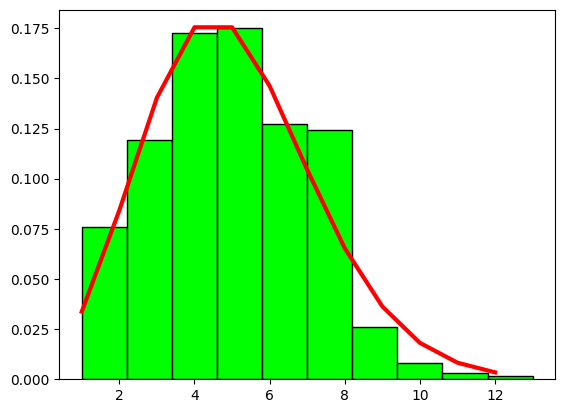

In [29]:
from scipy.stats import poisson
t0 = 5
tM = 20

def experiment(tM):
    N = 0
    while tM > 0:
        N += 1
        tM -= rng.random_exponential_interval(t0)
    return N

poissonX = np.array([experiment(tM) for _ in range(1000)])
poisson_fix = poisson(np.round(np.average(poissonX)))
X = np.arange(min(poissonX),max(poissonX))
plt.hist(poissonX,bins=10,edgecolor='black',color='lime',density=True)
plt.plot(X,poisson_fix.pmf(X),color='red',linewidth=3)
plt.plot()
plt.show()


## Exercise 7.3
